In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

/home/vt337/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
proj_dir = Path("..") / "Data/r77-mini-data-fortnight"
print(proj_dir.joinpath("input"))

data_dir = proj_dir
input_dir = data_dir.joinpath("input")
fixed_input_dir = input_dir.joinpath("fixed")
temporal_input_dir = input_dir.joinpath("temporal")
target_dir = data_dir.joinpath("target")
fixed_target_dir = target_dir.joinpath("fixed")
temporal_target_dir = target_dir.joinpath("temporal")

../Data/r77-mini-data-fortnight/input


In [4]:
files = list(temporal_target_dir.iterdir())

index_dir = Path("..")/"Index"
files_index = list(index_dir.iterdir())
indices = np.load(files_index[0]).squeeze()

#First hour of data
index = indices[0]
tt = np.load(files[index]).squeeze()
tt.shape

(144, 70, 100, 3)

In [5]:

tt_all = np.stack([
    np.transpose(np.load(files[indices[i]]).squeeze(), (0, 2, 3, 1))[:,:,:,:64].reshape(-1, 3, 64)
    for i in range(360)
])

data = tt_all.reshape(-1,3,64)
data.shape

(5184000, 3, 64)

In [6]:
files_fixed = list(fixed_input_dir.iterdir())
files_ft = list(fixed_target_dir.iterdir())
#std dev calculated for each grid using fxed target vectors, combined with fixed input vector to give three fixed variables for each grid
#fixed variables all (fixed input repeated 100 times for each grid)

cond = []

for j in range(360):
    index = indices[j]
    fi = np.load(files_fixed[index]).squeeze()
    ft = np.load(files_ft[index]).squeeze()

    stdev_orog = np.array([np.std(i) for i in ft[:,:,1]]).reshape(-1,1)
    fixed_input = np.hstack((fi, stdev_orog))
    reshaped_fi = np.repeat(fixed_input, 100, axis=0)
    cond.append(reshaped_fi)


cond = np.concatenate(cond).reshape(-1, 3)
cond.shape

(5184000, 3)

In [7]:
lsf = cond[:,0]
orog = cond[:,1]
stdev_orog = cond[:,2]

In [8]:
land = lsf[np.where((lsf == 1))[0]]
coastal = lsf[np.where((lsf < 1) & (lsf > 0))[0]]
sea = lsf[np.where((lsf == 0))[0]]

sizes = [len(land), len(coastal), len(sea)]
labels = ['Land', 'Coastal', 'Sea']

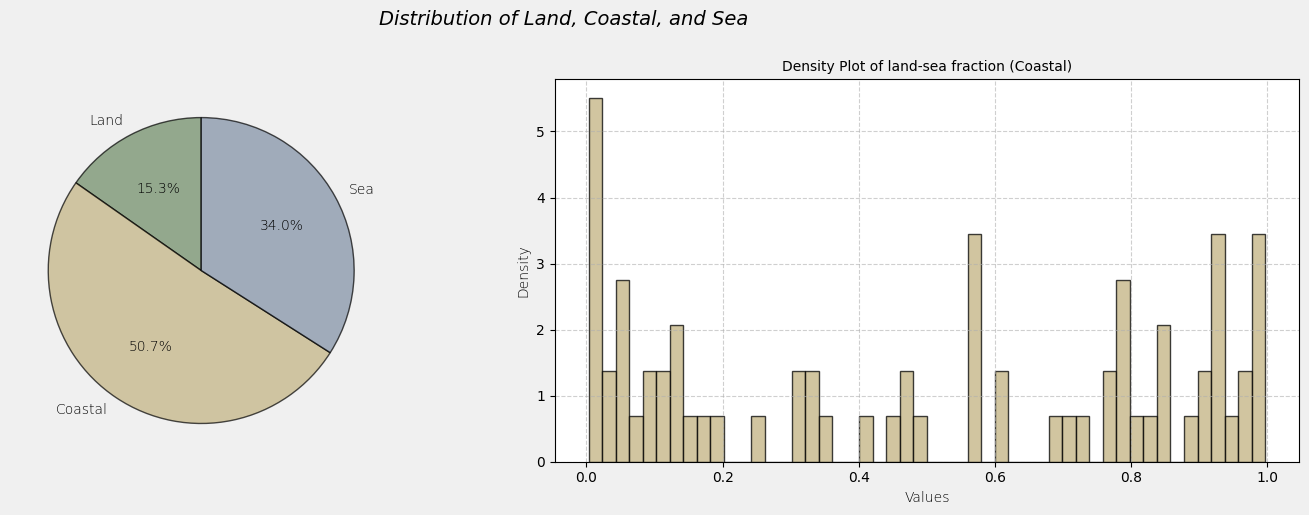

In [9]:


fig, axs = plt.subplots(1, 2, figsize=(15, 5))


fig.patch.set_facecolor('#f0f0f0')


wedges, texts, autotexts = axs[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
                                      colors=['#6c8a64', '#c2b280', '#7f8ea3'],  # Muted colors
                                      textprops={'fontsize': 10, 'weight': 'light'}, 
                                      wedgeprops={'alpha': 0.7, 'linewidth': 1, 'edgecolor': 'black'})  # Outline with white color



for autotext in autotexts:
    autotext.set_color('black')


axs[1].hist(coastal, bins=50, density=True, color='#c2b280', edgecolor='black', alpha=0.75)  # Using the muted yellow
axs[1].set_xlabel('Values', fontsize=10, weight='light', fontfamily='sans-serif')
axs[1].set_ylabel('Density', fontsize=10, weight='light', fontfamily='sans-serif')
axs[1].set_title('Density Plot of land-sea fraction (Coastal)', fontsize=10)


plt.tight_layout(rect=[0, 0, 1, 0.95])


axs[1].grid(True, linestyle='--', alpha=0.6)


fig.suptitle('Distribution of Land, Coastal, and Sea', fontsize=14, fontstyle='italic', fontfamily='sans-serif', y=1.02)

plt.show()


In [10]:
land = cond[np.where((lsf == 1))[0]]
coastal = cond[np.where((lsf < 1) & (lsf > 0.2))[0]]
sea = cond[np.where((lsf <= 0.2))[0]]

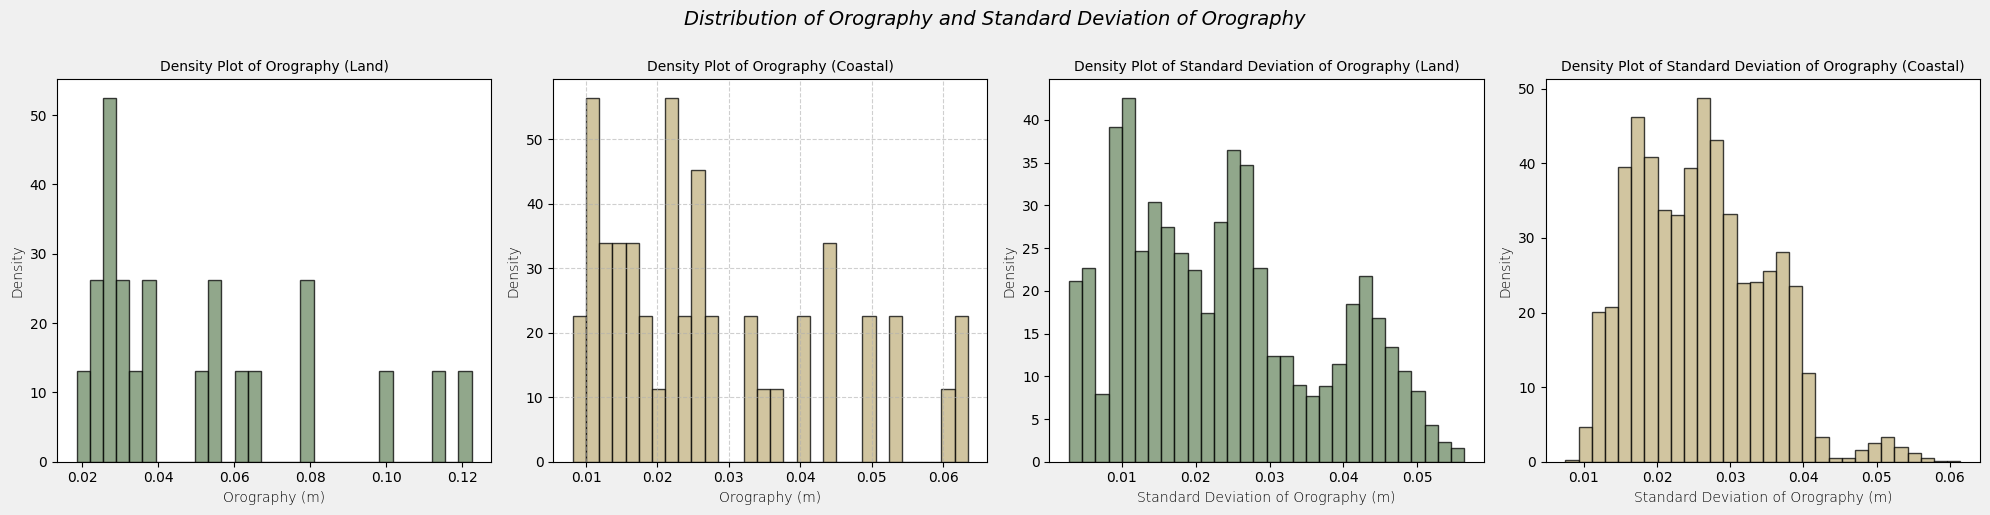

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

fig.patch.set_facecolor('#f0f0f0')

axs[0].hist(land[:,1], bins=30, density=True, color='#6c8a64', edgecolor='black', alpha=0.75)  # Using the muted yellow
axs[0].set_xlabel('Orography (m)', fontsize=10, weight='light', fontfamily='sans-serif')
axs[0].set_ylabel('Density', fontsize=10, weight='light', fontfamily='sans-serif')
axs[0].set_title('Density Plot of Orography (Land)', fontsize=10)

axs[1].hist(coastal[:,1], bins=30, density=True, color='#c2b280', edgecolor='black', alpha=0.75)  # Using the muted yellow
axs[1].set_xlabel('Orography (m)', fontsize=10, weight='light', fontfamily='sans-serif')
axs[1].set_ylabel('Density', fontsize=10, weight='light', fontfamily='sans-serif')
axs[1].set_title('Density Plot of Orography (Coastal)', fontsize=10)

axs[2].hist(land[:,2], bins=30, density=True, color='#6c8a64', edgecolor='black', alpha=0.75)  # Using the muted yellow
axs[2].set_xlabel('Standard Deviation of Orography (m)', fontsize=10, weight='light', fontfamily='sans-serif')
axs[2].set_ylabel('Density', fontsize=10, weight='light', fontfamily='sans-serif')
axs[2].set_title('Density Plot of Standard Deviation of Orography (Land)', fontsize=10)

axs[3].hist(coastal[:,2], bins=30, density=True, color='#c2b280', edgecolor='black', alpha=0.75)  # Using the muted yellow
axs[3].set_xlabel('Standard Deviation of Orography (m)', fontsize=10, weight='light', fontfamily='sans-serif')
axs[3].set_ylabel('Density', fontsize=10, weight='light', fontfamily='sans-serif')
axs[3].set_title('Density Plot of Standard Deviation of Orography (Coastal)', fontsize=10)


plt.tight_layout(rect=[0, 0, 1, 0.95])


axs[1].grid(True, linestyle='--', alpha=0.6)


fig.suptitle('Distribution of Orography and Standard Deviation of Orography', fontsize=14, fontstyle='italic', fontfamily='sans-serif', y=1.02)

plt.show()


In [18]:
np.max(stdev_orog)

np.float64(0.06143009411203539)

In [13]:
#has inversion
def has_inversion(temperature_profile, troposphere_height):
    gradient = np.gradient(temperature_profile[:troposphere_height])
    return np.any(np.array(gradient) > 0.0)


In [14]:
no_inversions = []
for i in range(360):
    #First hour of data
    index = indices[i]
    tt = np.load(files[index]).squeeze()
    transposed_tt = np.transpose(tt, (0, 2, 3, 1))[:,:,:,:64]
    reshaped_tt = transposed_tt.reshape(-1, 3, 64)
    inversion = np.array([has_inversion(i, 40) for i in reshaped_tt[:,2,:]])
    no_inversions.append(inversion[inversion == False].shape[0])

In [15]:
no_inversions = np.array(no_inversions)
reshaped_data = no_inversions.reshape(15, 24)
summed_inv = reshaped_data.sum(axis=0)

In [16]:
sum(summed_inv)

np.int64(1220648)

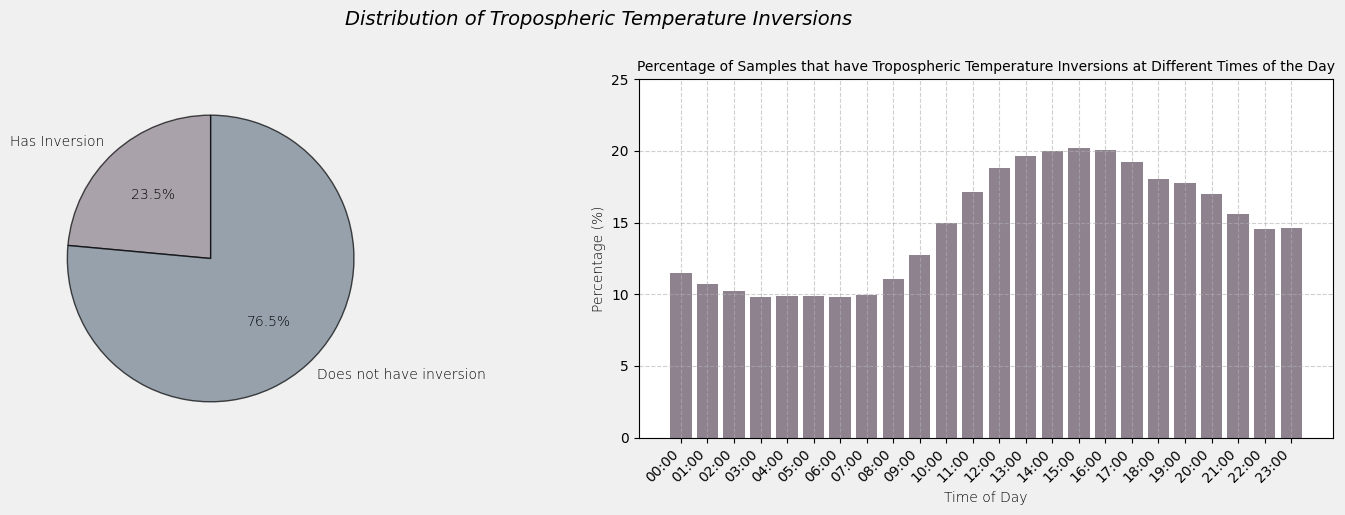

In [17]:

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


fig.patch.set_facecolor('#f0f0f0')

wedges, texts, autotexts = axs[0].pie([sum(summed_inv), 5184000 - sum(summed_inv)], labels=['Has Inversion', 'Does not have inversion'], autopct='%1.1f%%', startangle=90, 
                                      colors=['#8D828E', '#708090'],  
                                      textprops={'fontsize': 10, 'weight': 'light'}, 
                                      wedgeprops={'alpha': 0.7, 'linewidth': 1, 'edgecolor': 'black'})  




for autotext in autotexts:
    autotext.set_color('black')


time_labels = [f'{hour:02}:00' for hour in range(24)]

axs[1].bar(np.arange(24), summed_inv/345600*100, color='#8D828E') 


axs[1].set_xticks(np.arange(24))
axs[1].set_xticklabels(time_labels, rotation=45, ha='right', fontsize=10)  


axs[1].set_ylabel('Percentage (%)', fontsize=10, weight='light', fontfamily='sans-serif')

# Limit y-axis to 100%
axs[1].set_ylim(0, 25)

# Set x-axis label and title
axs[1].set_xlabel('Time of Day', fontsize=10, weight='light', fontfamily='sans-serif')
axs[1].set_title('Percentage of Samples that have Tropospheric Temperature Inversions at Different Times of the Day', fontsize=10)


# Adjusting the layout for a cleaner look, with space for the title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Adding grid lines to the histogram for better readability
axs[1].grid(True, linestyle='--', alpha=0.6)

# Adding the overall title with some space
fig.suptitle('Distribution of Tropospheric Temperature Inversions', fontsize=14, fontstyle='italic', fontfamily='sans-serif', y=1.02)

plt.show()